To what extent has the taxi business returned to Pre-Covid numbers based on Yellow Taxis records and Covid numbers.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import datetime as datetime
import pandas as pd
import numpy as np
from plotnine import *

from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score #model evaluation
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split # simple TT split cv


## a) ##

In [2]:
CovidSet= pd.read_csv("covidDataByDay.csv")
TaxiJanSet = pd.read_csv("yellow_tripdata_2020-01.csv")
TaxiFebSet = pd.read_csv("yellow_tripdata_2020-02.csv")
TaxiMarchSet= pd.read_csv("yellow_tripdata_2020-03.csv")
TaxiAprilSet= pd.read_csv("yellow_tripdata_2020-04.csv")
TaxiMaySet= pd.read_csv("yellow_tripdata_2020-05.csv")
TaxiJuneSet= pd.read_csv("yellow_tripdata_2020-06.csv")
TaxiJulySet= pd.read_csv("yellow_tripdata_2020-07.csv")
TaxiAugustSet= pd.read_csv("yellow_tripdata_2020-08.csv")
TaxiSeptSet= pd.read_csv("yellow_tripdata_2020-09.csv")
TaxiOctSet= pd.read_csv("yellow_tripdata_2020-10.csv")
TaxiNovSet= pd.read_csv("yellow_tripdata_2020-11.csv")
TaxiDecSet= pd.read_csv("yellow_tripdata_2020-12.csv")

TaxiJanSet2 = pd.read_csv("yellow_tripdata_2021-01.csv")
TaxiFebSet2 = pd.read_csv("yellow_tripdata_2021-02.csv")
TaxiMarchSet2 = pd.read_csv("yellow_tripdata_2021-03.csv")
TaxiAprilSet2= pd.read_csv("yellow_tripdata_2021-04.csv")
TaxiMaySet2 = pd.read_csv("yellow_tripdata_2021-05.csv")
TaxiJuneSet2 = pd.read_csv("yellow_tripdata_2021-06.csv")
TaxiJulySet2 = pd.read_csv("yellow_tripdata_2021-07.csv")

In [3]:
TaxiJanSet=TaxiJanSet[["tpep_pickup_datetime","VendorID"]]
TaxiFebSet=TaxiFebSet[["tpep_pickup_datetime","VendorID"]]
TaxiMarchSet=TaxiMarchSet[["tpep_pickup_datetime","VendorID"]]
TaxiAprilSet=TaxiAprilSet[["tpep_pickup_datetime","VendorID"]]
TaxiMaySet=TaxiMaySet[["tpep_pickup_datetime","VendorID"]]
TaxiJuneSet=TaxiJuneSet[["tpep_pickup_datetime","VendorID"]]
TaxiJulySet=TaxiJulySet[["tpep_pickup_datetime","VendorID"]]
TaxiAugustSet=TaxiAugustSet[["tpep_pickup_datetime","VendorID"]]
TaxiSeptSet=TaxiSeptSet[["tpep_pickup_datetime","VendorID"]]
TaxiOctSet=TaxiOctSet[["tpep_pickup_datetime","VendorID"]]
TaxiNovSet=TaxiNovSet[["tpep_pickup_datetime","VendorID"]]
TaxiAprilSet=TaxiAprilSet[["tpep_pickup_datetime","VendorID"]]
TaxiDecSet=TaxiDecSet[["tpep_pickup_datetime","VendorID"]]

TaxiJanSet2=TaxiJanSet2[["tpep_pickup_datetime","VendorID"]]
TaxiFebSet2=TaxiFebSet2[["tpep_pickup_datetime","VendorID"]]
TaxiMarchSet2=TaxiMarchSet2[["tpep_pickup_datetime","VendorID"]]
TaxiAprilSet2=TaxiAprilSet2[["tpep_pickup_datetime","VendorID"]]
TaxiMaySet2=TaxiMaySet2[["tpep_pickup_datetime","VendorID"]]
TaxiJuneSet2=TaxiJuneSet2[["tpep_pickup_datetime","VendorID"]]
TaxiJulySet2=TaxiJulySet2[["tpep_pickup_datetime","VendorID"]]

In [4]:
bigSet = pd.concat([TaxiJanSet,
TaxiFebSet,
TaxiMarchSet,
TaxiAprilSet,
TaxiMaySet,
TaxiJuneSet,
TaxiJulySet,
TaxiAugustSet,
TaxiSeptSet,
TaxiOctSet,
TaxiNovSet,
TaxiDecSet,
TaxiJanSet2,
TaxiFebSet2,
TaxiMarchSet2,
TaxiAprilSet2,
TaxiMaySet2,
TaxiJuneSet2,
TaxiJulySet2],axis = 0)
bigSet.head()

tpep_pickup_datetime  VendorID
0  2020-01-01 00:28:15       1.0
1  2020-01-01 00:35:39       1.0
2  2020-01-01 00:47:41       1.0
3  2020-01-01 00:55:23       1.0
4  2020-01-01 00:01:58       2.0

In [5]:
bigSet['tpep_pickup_datetime'] = pd.to_datetime(bigSet['tpep_pickup_datetime']).dt.date
bigSet=bigSet.rename(columns={"tpep_pickup_datetime": "date"})

In [6]:
TaxiTransactionAmmountWithoutCovid = pd.DataFrame(bigSet.groupby(['date']).count())
TaxiTransactionAmmountWithoutCovid = TaxiTransactionAmmountWithoutCovid.rename(columns={"VendorID": "Count"})
TaxiTransactionAmmountWithoutCovid = TaxiTransactionAmmountWithoutCovid.reset_index()
TaxiTransactionAmmountWithoutCovid.head()

date  Count
0  2002-12-31      2
1  2003-01-01      1
2  2003-01-05      1
3  2003-03-26      1
4  2004-04-04      1

In [7]:
CovidSet['date_of_interest'] = pd.to_datetime(CovidSet['date_of_interest']).dt.date
CovidSet=CovidSet.rename(columns={"date_of_interest": "date"})

In [8]:
TaxiTransactionAmmount = pd.DataFrame(bigSet.groupby(['date']).count())
TaxiTransactionAmmount = TaxiTransactionAmmount.rename(columns={"VendorID": "Count"})
TaxiTransactionAmmount = TaxiTransactionAmmount["Count"]
mergeSet = CovidSet.merge(TaxiTransactionAmmount.rename('Transaction Count'), on='date', how='inner')

In [9]:
# mergeSet = mergeSet[["date","CASE_COUNT","HOSPITALIZED_COUNT","DEATH_COUNT","Transaction Count"]]
mergeSet.head()

date  CASE_COUNT  PROBABLE_CASE_COUNT  HOSPITALIZED_COUNT  \
0  2020-02-29           1                    0                   1   
1  2020-03-01           0                    0                   1   
2  2020-03-02           0                    0                   2   
3  2020-03-03           1                    0                   7   
4  2020-03-04           5                    0                   2   

   DEATH_COUNT  PROBABLE_DEATH_COUNT  CASE_COUNT_7DAY_AVG  \
0            0                     0                    0   
1            0                     0                    0   
2            0                     0                    0   
3            0                     0                    0   
4            0                     0                    0   

   ALL_CASE_COUNT_7DAY_AVG  HOSP_COUNT_7DAY_AVG  DEATH_COUNT_7DAY_AVG  ...  \
0                        0                    0                     0  ...   
1                        0                    0                     0  ...   
2                        0                    0                     0  ...   
3                        0                    0                     0  ...   
4                        0                    0                     0  ...   

   SI_DEATH_COUNT  SI_PROBABLE_DEATH_COUNT  SI_CASE_COUNT_7DAY_AVG  \
0               0                        0                       0   
1               0                        0                       0   
2               0                        0                       0   
3               0                        0                       0   
4               0                        0                       0   

   SI_PROBABLE_CASE_COUNT_7DAY_AVG  SI_ALL_CASE_COUNT_7DAY_AVG  \
0                                0                           0   
1                                0                           0   
2                                0                           0   
3                                0                           0   
4                                0                           0   

   SI_HOSPITALIZED_COUNT_7DAY_AVG  SI_DEATH_COUNT_7DAY_AVG  \
0                               0                        0   
1                               0                        0   
2                               0                        0   
3                               0                        0   
4                               0                        0   

   SI_ALL_DEATH_COUNT_7DAY_AVG  INCOMPLETE  Transaction Count  
0                            0           0             229399  
1                            0           0             178358  
2                            0           0             191558  
3                            0           0             220687  
4                            0           0             227512  

[5 rows x 68 columns]

In [10]:
plot1 = (ggplot(mergeSet, aes(x = "date", y = "Transaction Count")) + geom_point()+
    theme_minimal()+
    labs(x = "", y = "Transactions Per Day")+
    ggtitle("Daily Transactions: Mar 2020 - Jul 2021")+
    theme(panel_grid_major_x = element_blank(),
        axis_title_x=element_blank(),
        axis_text_x=element_blank())
     )

plot2 = (ggplot(mergeSet, aes(x = "date", y = "CASE_COUNT")) + geom_point()+
    theme_minimal()+
    labs(x = "", y = "Daily Covid Cases Per Day")+
    ggtitle("Covid Cases: Mar 2020 - Jul 2021")+
    theme(panel_grid_major_x = element_blank(),
        axis_title_x=element_blank(),
        axis_text_x=element_blank())
     )
plot3 = (ggplot(mergeSet, aes(x = "date", y = "DEATH_COUNT")) + geom_point()+
    theme_minimal()+
    labs(x = "", y = "Daily Covid Deaths Per Day")+
    ggtitle("Covid Deaths: Mar 2020 - Jul 2021")+
    theme(panel_grid_major_x = element_blank(),
        axis_title_x=element_blank(),
        axis_text_x=element_blank())
     )

In [11]:

plot4 =(ggplot(TaxiTransactionAmmountWithoutCovid, aes(x = "date", y = "Count")) + geom_point()+
    theme_minimal()+
    labs(x = "", y = "Transactions Per Day")+
    ggtitle("Daily Transactions: Jan 2020 - Jul 2021")+
    theme(panel_grid_major_x = element_blank(),
        axis_title_x=element_blank(),
        axis_text_x=element_blank())
     )


## b) ##

To quickly answer, no it has not. 

As can be see in the graph at the very bottom of this document, the daily transaction count was at 200,000 in early 2020 from Jan - Feb. This dropped steeply to super samll amounts. You can see the slow climbing over the following months up to Jul 2021. This shows that the industry is returning back to normal levels but slowly and its only at half of what it was at in the 2020 Jan level.

## c) ##

This first graph is the Daily Taxi Transactions Ranging from Mar 2020 till July 2021

This Second graph is the Covid Case Count in NYC Ranging from Mar 2020 till July 2021

This Third graph is the Covid Death Count in NYC Ranging from Mar 2020 till July 2021

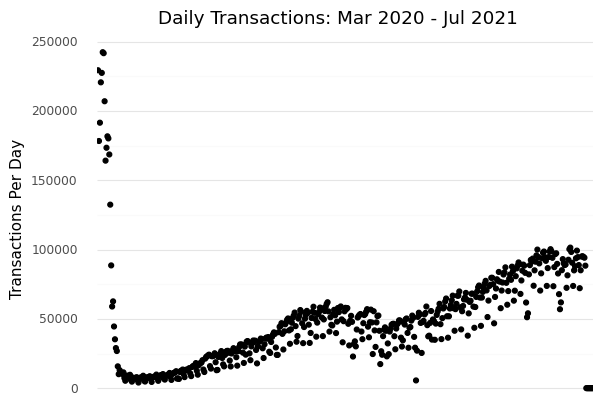

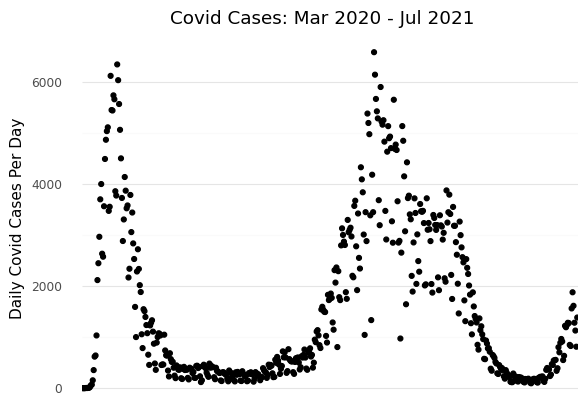

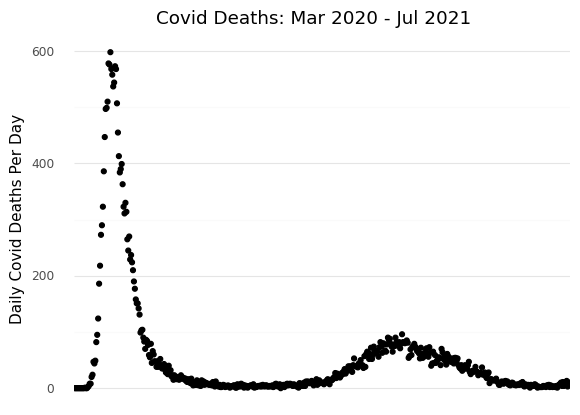

In [12]:
print(plot1)
print(plot2)
print(plot3)

The following grpah is the same as graph number 1 but includes Jan 2020 and Feb 2020 aswell to get a baseline for the taxi industry

The graph is the Daily Taxi Transactions Ranging from Jan 2020 till July 2021


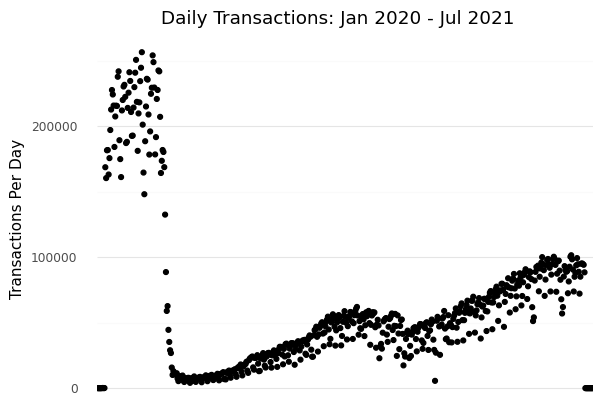

In [13]:
print(plot4)